## Spike's blood glucose log

In [2]:
%pylab nbagg
import datetime 
import matplotlib.dates as mdates

Populating the interactive namespace from numpy and matplotlib


In [8]:
entries = np.array([[datetime.datetime(year=2018, month=11, day=1,hour=8,minute=15),\
                    datetime.datetime(year=2018, month=11, day=1,hour=9,minute=30),\
                    datetime.datetime(year=2018, month=11, day=1,hour=11,minute=16),\
                     datetime.datetime(year=2018, month=11, day=1,hour=12,minute=10),
                    datetime.datetime(year=2018, month=11, day=1,hour=13,minute=30)],
                    [220,96,94,141,190]])



In [9]:
# convert mg/dL to mmol/L
#x = 564
#x1 = (x/1e3)*1e1 #g/L
#x1= x1/.180156 #g/mmol*L div molar mass of glucose in mmol
#print(x1)

for i in range(len(entries[1])):
    entries[1][i] = (entries[1][i]/1e2)/.180156   
print(entries)

[[datetime.datetime(2018, 11, 1, 8, 15)
  datetime.datetime(2018, 11, 1, 9, 30)
  datetime.datetime(2018, 11, 1, 11, 16)
  datetime.datetime(2018, 11, 1, 12, 10)
  datetime.datetime(2018, 11, 1, 13, 30)]
 [12.211638801927219 5.32871511356824 5.217700215368902 7.826550323053353
  10.546415328937142]]


In [10]:
times = []
safe1 = []
ideal1 = []
ideal2 = []

for i in range(0,12):
    times.append(datetime.datetime(year=2018, month=10, day=31,hour=1))
    safe1.append(3.6)
    ideal1.append(16.7)
    ideal2.append(5.6) 

In [11]:
x = mdates.date2num(entries[0])

z4 = np.polyfit(x, entries[1], 2)
p4 = np.poly1d(z4)

<IPython.core.display.Javascript object>


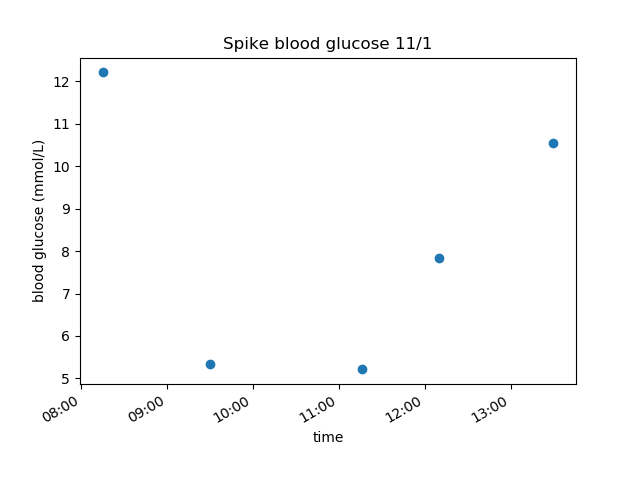

[736999.34375    736999.34821429 736999.35267857 736999.35714286
 736999.36160714 736999.36607143 736999.37053571 736999.375
 736999.37946429 736999.38392857 736999.38839286 736999.39285714
 736999.39732143 736999.40178571 736999.40625    736999.41071429
 736999.41517857 736999.41964286 736999.42410714 736999.42857143
 736999.43303571 736999.4375     736999.44196429 736999.44642857
 736999.45089286 736999.45535714 736999.45982143 736999.46428571
 736999.46875    736999.47321429 736999.47767857 736999.48214286
 736999.48660714 736999.49107143 736999.49553571 736999.5
 736999.50446429 736999.50892857 736999.51339286 736999.51785714
 736999.52232143 736999.52678571 736999.53125    736999.53571429
 736999.54017857 736999.54464286 736999.54910714 736999.55357143
 736999.55803571 736999.5625    ]


In [12]:
#fig, ax = plt.subplots()
ifig=1;close(ifig);figure(ifig)
xx = np.linspace(x.min(), x.max(), 50)
print(xx)
dd = mdates.num2date(xx)
#dd1 = mdates.num2date(1,24)

#plt.plot(safe1,dd1,'r')
#plt.plot(dd, p4(xx), '-g')
matplotlib.pyplot.plot_date(entries[0],entries[1])
plt.gcf().autofmt_xdate()
plt.title('Spike blood glucose 11/1')
plt.ylabel('blood glucose (mmol/L)')
plt.xlabel('time')
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.savefig('spike2.png')